ссылка на таблицу с результатом предсказаний
https://docs.google.com/spreadsheets/d/1aAt4svhExSpQOkAxLF-WjEzwQEEwL2c_/edit?usp=sharing&ouid=117504778252107175976&rtpof=true&sd=true

#Импорты, после первой ячейки вас выкинет, но не переживайте и продолжайте запуск ноутбука

In [5]:
!pip install numpy==1.24.4

In [6]:
import sys
# Install dependencies if the notebook is running in Colab
if 'google.colab' in sys.modules:
    !pip install -U -qq tsa-course pmdarima

ERROR: Operation cancelled by user


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import gdown
import statsmodels as ss
import holidays
import pmdarima as pm
from sklearn.preprocessing import LabelEncoder
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

In [9]:
!gdown 1fVYIghsx9zDlKXV8u2bVGAXmGwbCTNaA
df = pd.read_csv('/content/CupIT_Sber_data.csv', sep = ';')

Downloading...
From (original): https://drive.google.com/uc?id=1fVYIghsx9zDlKXV8u2bVGAXmGwbCTNaA
From (redirected): https://drive.google.com/uc?id=1fVYIghsx9zDlKXV8u2bVGAXmGwbCTNaA&confirm=t&uuid=0e2dc48f-08a6-481f-8ec9-1d780fb17c56
To: /content/CupIT_Sber_data.csv
100% 230M/230M [00:02<00:00, 111MB/s] 


In [10]:
df = pd.read_csv('/content/CupIT_Sber_data.csv', sep = ';')
df['service_date'] = pd.to_datetime(df['service_date'])
df['service_amount_net'] = df['service_amount_net'].str.replace(',', '.')
df['date'] = df['service_date'].dt.date
df['month'] = df['service_date'].dt.month
df['year'] = df['service_date'].dt.year
df['week'] = df['service_date'].dt.isocalendar().week
df['service_amount_net'] = df['service_amount_net'].astype(float)
df

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,date,month,year,week
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.00,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022-01-01,1,2022,52
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.00,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022-01-01,1,2022,52
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.00,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022-01-01,1,2022,52
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.00,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022-01-01,1,2022,52
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.00,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022-01-01,1,2022,52
...,...,...,...,...,...,...,...,...,...,...,...,...
1091038,0xAF0854F4B12F33F7E708D054EA4C4E39,0x4BA2F4D793766AE703CC498131301D95,2023-12-21 10:57:00,1297.00,0x60932DBC67AD0E50CFCEF91E5A636E67,0x2967289004C10B000F45A9ED3FD42988,0x28D5058F50AAF33F5CFAD39D1F33E733,0,2023-12-21,12,2023,51
1091039,0x4B41C55DDC997B70CC37F7BC037BE0FF,0x980634735FC5C16158DC773FBF729F8F,2023-12-21 10:57:00,445.00,0x60932DBC67AD0E50CFCEF91E5A636E67,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0,2023-12-21,12,2023,51
1091040,0x65AC689ED66DADBE72A979C6C5971666,0x0FBD82C28836C2E8A5FC83939E32CA1D,2023-12-30 09:28:00,9726.00,0x96146D12EDF353CCADC6126BA97E180E,0x7EE918316FD3AEA062AF090BD4535E4C,0xC789986064B7B7656159FFB180390DB9,0,2023-12-30,12,2023,52
1091041,0xD5DD4B29D93C2871463BC635FD574355,0xDB4C4A6CBD0B06EEC8DD55F1FF7EEEC3,2023-12-30 09:57:00,1764.00,0x96146D12EDF353CCADC6126BA97E180E,0xDBA2BFA1540877BB3F5969DDDFEBAECF,0x389978FE61E4BDD814604F07FD9E7823,0,2023-12-30,12,2023,52


#Небольшой анализ данных и визуализация

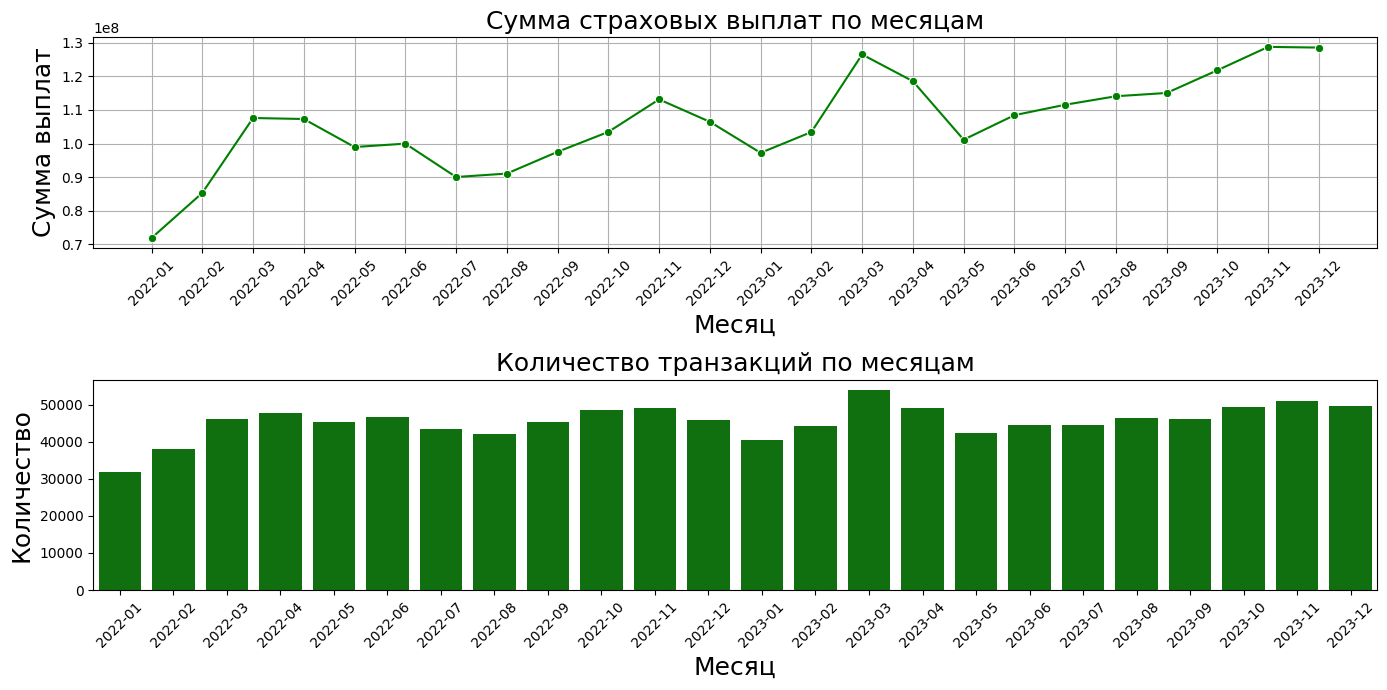

In [79]:
import seaborn as sns
monthly_payments = df.groupby(['year', 'month'])['service_amount_net'].agg(['sum', 'count']).reset_index()
monthly_payments.columns = ['year', 'month', 'total_amount', 'transactions_count']
monthly_payments['year_month'] = monthly_payments['year'].astype(str) + '-' + monthly_payments['month'].astype(str).str.zfill(2)
# 3. Визуализация
plt.figure(figsize=(14, 7))

# График суммы выплат
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_payments, x='year_month', y='total_amount', marker='o', color='green')
plt.title('Сумма страховых выплат по месяцам',fontsize=18)
plt.xlabel('Месяц', fontsize=18)
plt.ylabel('Сумма выплат', fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)

# График количества транзакций
plt.subplot(2, 1, 2)
sns.barplot(data=monthly_payments, x='year_month', y='transactions_count', color='green')
plt.title('Количество транзакций по месяцам', fontsize=18)
plt.xlabel('Месяц', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig("myPNG.png")


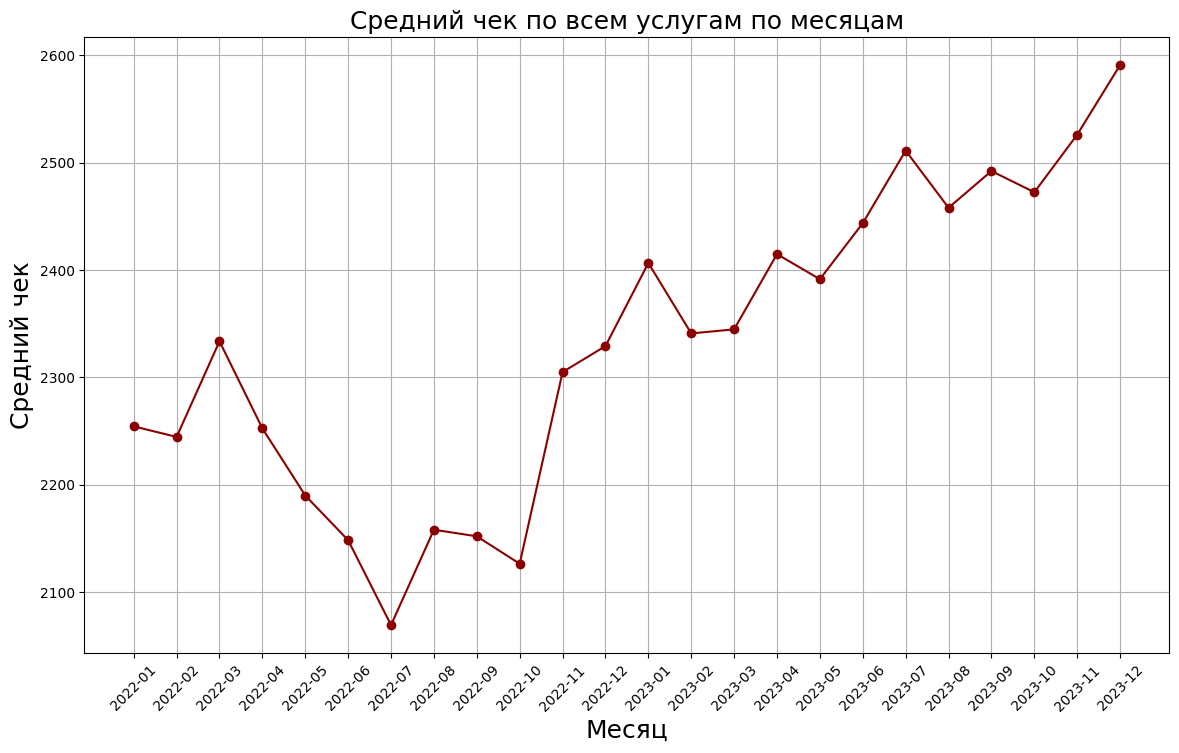

In [78]:
monthly_avg_check = df.groupby(['year', 'month']).agg(
    avg_payment=('service_amount_net', 'mean'),
    transaction_count=('service_amount_net', 'count')
).reset_index()

# Добавляем удобную колонку с датой
monthly_avg_check['year_month'] = monthly_avg_check['year'].astype(str) + '-' + monthly_avg_check['month'].astype(str).str.zfill(2)

# Визуализация
plt.figure(figsize=(14, 8))
plt.plot(monthly_avg_check['year_month'], monthly_avg_check['avg_payment'], marker='o', color='darkred')
plt.title('Средний чек по всем услугам по месяцам', fontsize=18)
plt.xlabel('Месяц', fontsize=18)
plt.ylabel('Средний чек', fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)

# print("Таблица среднего чека по месяцам:")
# display(monthly_avg_check[['year_month', 'avg_payment', 'transaction_count']].head())
plt.savefig('df.png')

#Получение датасета

In [11]:
# Создание нового датасета с необходимыми признаками
summary_df = df.groupby('date').agg(
    total_services=('service_document_id', 'count'),
    total_payments=('service_amount_net', 'sum'),
    average_payment=('service_amount_net', 'mean')
).reset_index()

summary_df['quantity_service_hospital'] = df[df['is_hospital'] == 1].groupby('service_date')['service_document_id'].transform('count')

# Количество уникальных пациентских документов за день
summary_df['unique_service_id'] = df.groupby('service_date')['service_document_id'].transform('nunique')

# Количество уникальных счетов за день
summary_df['unique_account_id'] = df.groupby('service_date')['account_document_id'].transform('nunique')

summary_df["date"] = pd.to_datetime(summary_df["date"])
summary_df = summary_df.set_index('date')
summary_df = summary_df.fillna(0)

summary_df

,total_services,total_payments,average_payment,quantity_service_hospital,unique_service_id,unique_account_id
date,,,,,,
2022-01-01,80,205120.00,2564.000000,0.0,1,1
2022-01-02,348,628479.09,1805.974397,0.0,1,1
2022-01-03,609,1144928.00,1880.013136,0.0,1,1
2022-01-04,566,1132375.51,2000.663445,0.0,1,1
2022-01-05,800,1539390.15,1924.237687,0.0,1,1
...,...,...,...,...,...,...
2023-12-27,1702,4571180.39,2685.769912,0.0,10,10
2023-12-28,1458,3503689.85,2403.079458,0.0,10,10
2023-12-29,1317,3089895.15,2346.161845,0.0,10,10


Создание датасета с 24м годом и группировка по неделям

In [12]:
w = pd.period_range('2024-01-01', periods=365, freq='1D')
w = pd.DataFrame(index=w)
w.index.name = 'date'
w = w.to_timestamp()
w
# Добавляем дополнительные даты в DataFrame
sd = pd.concat([summary_df, w])

sd.index = pd.to_datetime(sd.index)

sd['date'] = sd.index
sd['month'] = pd.to_datetime(sd['date']).dt.month        # Месяц
sd['year'] = pd.to_datetime(sd['date']).dt.year          # Год
sd['week'] = pd.to_datetime(sd['date']).dt.isocalendar().week

sd = sd.fillna(0)

sd = sd.groupby(['year', 'week']).agg(
    date=('date', 'max'),
    total_services=('total_services', 'sum'),
    total_payments=('total_payments', 'sum'),
    average_payment=('average_payment', 'mean'),
    unique_service_id=('unique_service_id', 'mean'),
    unique_account_id=('unique_account_id', 'mean'))

sd.index=sd['date']
sd

,date,total_services,total_payments,average_payment,unique_service_id,unique_account_id
date,,,,,,
2022-01-09,2022-01-09,4481.0,9277261.94,2080.272669,1.000000,1.000000
2022-01-16,2022-01-16,8294.0,17662531.00,2139.590805,1.857143,1.857143
2022-01-23,2022-01-23,8684.0,20082785.14,2293.482123,1.285714,1.285714
2022-01-30,2022-01-30,8581.0,21032283.79,2425.257878,2.714286,2.714286
2022-02-06,2022-02-06,9497.0,20500927.08,2147.068595,2.142857,2.142857
...,...,...,...,...,...,...
2024-12-01,2024-12-01,0.0,0.00,0.000000,0.000000,0.000000
2024-12-08,2024-12-08,0.0,0.00,0.000000,0.000000,0.000000
2024-12-15,2024-12-15,0.0,0.00,0.000000,0.000000,0.000000


In [13]:
# Скользящее среднее на 3 месяца, пол года и год
sd['ma_12'] = sd['total_payments'].rolling(window=12, min_periods=0, closed="both", center=False).mean()
sd['ma_24'] = sd['total_payments'].rolling(window=24, min_periods=0, closed="both", center=False).mean()
sd['ma_52'] = sd['total_payments'].rolling(window=52, min_periods=0, closed="both", center=False).mean()

# 2. Общее количество услуг за последние 4 недели
sd['total_services_last_year'] = sd['total_services'].rolling(window=25, min_periods=0, closed="both", center=False).sum()
sd['mean_payments_last_year'] = sd['average_payment'].rolling(window=25, min_periods=0, closed="both", center=False).sum()

# 3. Количество уникальных пациентов за последние 4 недели
sd['unique_patients_last_year'] = sd['unique_account_id'].rolling(window=25, min_periods=0, closed="both", center=False).mean()

sd = sd.fillna(0)
sd = sd.replace(0, 1)
sd = sd.drop(columns='date')

sd

,total_services,total_payments,average_payment,unique_service_id,unique_account_id,ma_12,ma_24,ma_52,total_services_last_year,mean_payments_last_year,unique_patients_last_year
date,,,,,,,,,,,
2022-01-09,4481.0,9277261.94,2080.272669,1.000000,1.000000,9.277262e+06,9.277262e+06,9.277262e+06,4481.0,2080.272669,1.000000
2022-01-16,8294.0,17662531.00,2139.590805,1.857143,1.857143,1.346990e+07,1.346990e+07,1.346990e+07,12775.0,4219.863474,1.428571
2022-01-23,8684.0,20082785.14,2293.482123,1.285714,1.285714,1.567419e+07,1.567419e+07,1.567419e+07,21459.0,6513.345597,1.380952
2022-01-30,8581.0,21032283.79,2425.257878,2.714286,2.714286,1.701372e+07,1.701372e+07,1.701372e+07,30040.0,8938.603475,1.714286
2022-02-06,9497.0,20500927.08,2147.068595,2.142857,2.142857,1.771116e+07,1.771116e+07,1.771116e+07,39537.0,11085.672070,1.800000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,1.0,1.00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,2.828329e+06,1.0,1.000000,1.000000
2024-12-08,1.0,1.00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,2.193947e+06,1.0,1.000000,1.000000
2024-12-15,1.0,1.00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.564076e+06,1.0,1.000000,1.000000


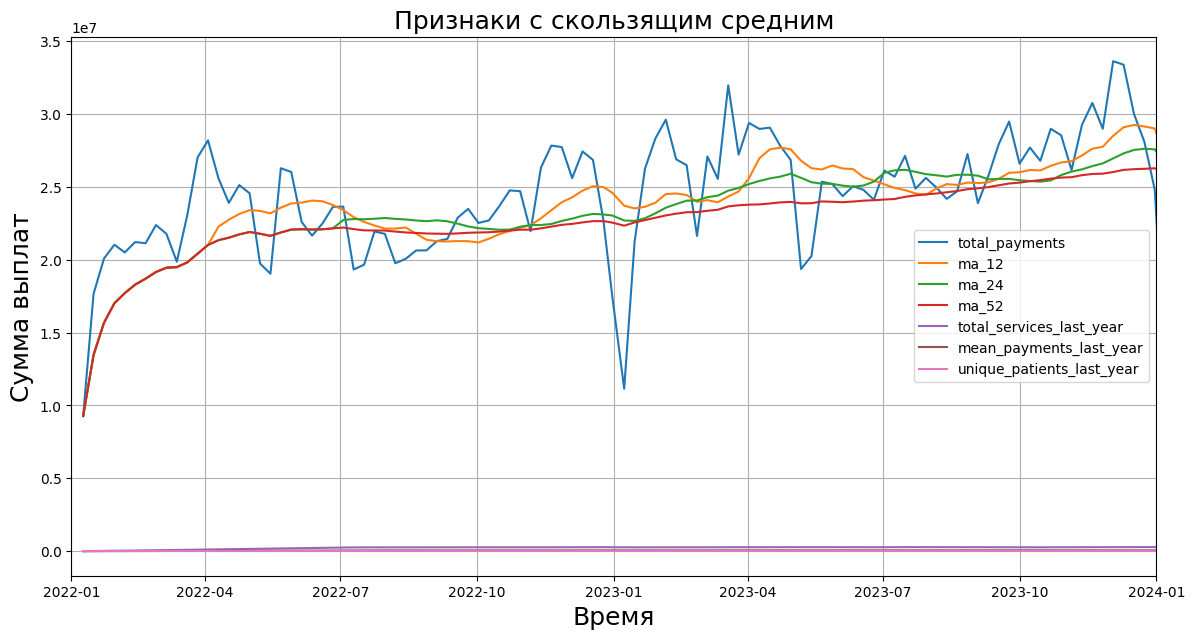

In [81]:
plt.figure(figsize=(14, 7))
# sd = sd.sort_values('date')
for i in sd.drop(columns=['total_services', 'average_payment', 'unique_service_id', 'unique_account_id']).columns:
  plt.plot(sd.sort_index()[f'{i}'], label=f"{i}")


plt.title("Признаки с скользящим средним", fontsize=18)
plt.xlabel("Время", fontsize=18)
plt.ylabel("Сумма выплат", fontsize=18)
plt.legend()
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2024-01-01'))
plt.grid(True)
plt.savefig('dg.png')

#Предсказание

###Сначала на просто временном ряду, без признаков

In [18]:
dataset = sd.drop(columns=['average_payment', 'total_services','unique_service_id','unique_account_id' ]).copy()

In [19]:
train_start = datetime.datetime(2022, 1, 1)
train_end = datetime.datetime(2022, 12, 31)

val_start = datetime.datetime(2023, 1, 1)
val_end = datetime.datetime(2023, 6, 1)

test_start = datetime.datetime(2023, 6, 2)
test_end = datetime.datetime(2024, 12, 30)

train_data = dataset.query("(`date` >= @train_start) & (`date` <= @train_end)")
val_data = dataset.query("(`date` >= @val_start) & (`date` <= @val_end)")
test_data = dataset.query("(`date` >= @test_start) & (`date` <= @test_end)")

train_data = train_data['total_payments']
val_data = val_data['total_payments']
test_data = test_data['total_payments']

In [20]:
stepwise_model = auto_arima(
    y=train_data,
    # X=train_data.drop(columns=["total_payments"]),
    start_p=1,
    start_q=1,
    max_p=5,
    max_q=5,
    m=18,
    start_P=0,
    seasonal=True,
    d=None,
    D=1,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
    maxiter=50,  # default 50
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[18] intercept   : AIC=1113.057, Time=1.35 sec
 ARIMA(0,0,0)(0,1,0)[18] intercept   : AIC=1142.035, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[18] intercept   : AIC=1113.587, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[18] intercept   : AIC=1119.260, Time=1.26 sec
 ARIMA(0,0,0)(0,1,0)[18]             : AIC=1145.772, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[18] intercept   : AIC=1113.509, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[18] intercept   : AIC=1114.740, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[18] intercept   : AIC=1114.717, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[18] intercept   : AIC=1112.900, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[18] intercept   : AIC=1114.717, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,1)[18] intercept   : AIC=inf, Time=2.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[18] intercept   : AIC=1119.077, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,1,0)[18] intercept   : AIC=1114.791, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,0)[18] intercept   : AIC=1110.588, Time=0.67 sec
 ARIMA(1,0,2)(0,1,0)[18] intercept   : AIC=1115.401, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,0)[18] intercept   : AIC=1110.233, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,1)[18] intercept   : AIC=1112.220, Time=5.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,1)[18] intercept   : AIC=1110.571, Time=1.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,1,0)[18] intercept   : AIC=1116.188, Time=0.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,1,0)[18] intercept   : AIC=1112.117, Time=2.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(2,1,0)[18] intercept   : AIC=1113.494, Time=2.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[18] intercept   : AIC=1119.060, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,1,0)[18] intercept   : AIC=1120.646, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,0)[18] intercept   : AIC=1116.578, Time=3.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(2,1,0)[18] intercept   : AIC=1113.153, Time=5.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,0)[18]             : AIC=1108.263, Time=1.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,0)[18]             : AIC=1108.548, Time=0.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,1)[18]             : AIC=1110.256, Time=2.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,1)[18]             : AIC=1108.620, Time=2.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,1,0)[18]             : AIC=1114.316, Time=1.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[18]             : AIC=1112.847, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,1,0)[18]             : AIC=1110.147, Time=2.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(2,1,0)[18]             : AIC=1111.621, Time=2.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[18]             : AIC=1117.526, Time=1.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,1,0)[18]             : AIC=1118.814, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,0)[18]             : AIC=1114.443, Time=1.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(2,1,0)[18]             : AIC=1111.295, Time=6.17 sec

Best model:  ARIMA(1,0,2)(2,1,0)[18]          
Total fit time: 58.569 seconds


In [21]:
start_data = train_data.index[-1] + pd.DateOffset(days=1)# Your code here
future_forecast_val = stepwise_model.predict(X = val_data.drop(columns=["total_payments"]), start=start_data, n_periods=21)

start_data = val_data.index[-1] + pd.DateOffset(days=1)# Your code here
future_forecast_test = stepwise_model.predict(X = test_data.drop(columns=["total_payments"]), start=start_data, n_periods=83)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.p

In [22]:
future_forecast_val = future_forecast_val.rename(index=dict(zip(future_forecast_val.index.tolist(),val_data.index.tolist())))
future_forecast_test = future_forecast_test.rename(index=dict(zip(future_forecast_test.index.tolist(),test_data.index.tolist())))

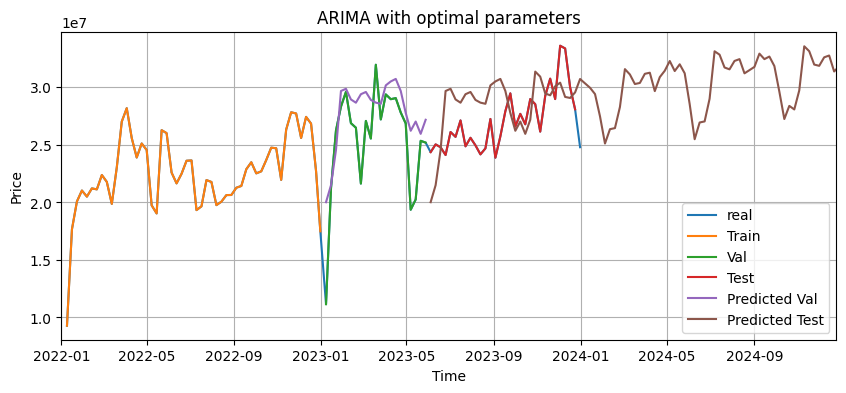

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(dataset['total_payments'][:104], label='real')
plt.plot(train_data, label="Train")
plt.plot(val_data, label="Val")
plt.plot(test_data[:30], label="Test")
plt.plot(future_forecast_val, label="Predicted Val")
plt.plot(future_forecast_test.sort_index(), label="Predicted Test")


plt.title("ARIMA with optimal parameters")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2024-12-25"))
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(val_data, future_forecast_val))
print("RMSE: " + str(rmse))

RMSE: 3720762.9545585937


In [85]:
future_forecast_val

,0,date,month,year
2023-01-08,2.001669e+07,2023-01-08,1,2023
2023-01-15,2.149417e+07,2023-01-15,1,2023
2023-01-22,2.455581e+07,2023-01-22,1,2023
2023-01-29,2.968535e+07,2023-01-29,1,2023
2023-02-05,2.987939e+07,2023-02-05,2,2023
2023-02-12,2.895175e+07,2023-02-12,2,2023
2023-02-19,2.866816e+07,2023-02-19,2,2023
2023-02-26,2.940659e+07,2023-02-26,2,2023
2023-03-05,2.960131e+07,2023-03-05,3,2023
2023-03-12,2.890966e+07,2023-03-12,3,2023


In [99]:
actual, pred1 = np.array(val_data), np.array(future_forecast_val[0])
mape = np.mean(np.abs((actual - pred1) / actual)) * 100
print("MAPE: " + str(mape))

MAPE: 13.600713043886195


Перевод в сумму по месяцам из суммы по неделям

In [94]:
future_forecast_test = pd.DataFrame(future_forecast_test)
future_forecast_test['date'] = future_forecast_test.index
future_forecast_test['month'] = pd.to_datetime(future_forecast_test['date']).dt.month        # Месяц
future_forecast_test['year'] = pd.to_datetime(future_forecast_test['date']).dt.year
pred = future_forecast_test.groupby(['year', 'month']).agg(
    date=('date', 'max'),
    tot=(0, 'sum'))

future_forecast_val = pd.DataFrame(future_forecast_val)
future_forecast_val['date'] = future_forecast_val.index
future_forecast_val['month'] = pd.to_datetime(future_forecast_val['date']).dt.month        # Месяц
future_forecast_val['year'] = pd.to_datetime(future_forecast_val['date']).dt.year
val = future_forecast_val.groupby(['year', 'month']).agg(
    date=('date', 'max'),
    tot=(0, 'sum'))

dataset['date'] = dataset.index
dataset['month'] = pd.to_datetime(dataset['date']).dt.month        # Месяц
dataset['year'] = pd.to_datetime(dataset['date']).dt.year
real = dataset.groupby(['year', 'month']).agg(
    date=('date', 'max'),
    tot=('total_payments', 'sum'))

real.index = real['date']
val.index = val['date']
pred.index = pred['date']

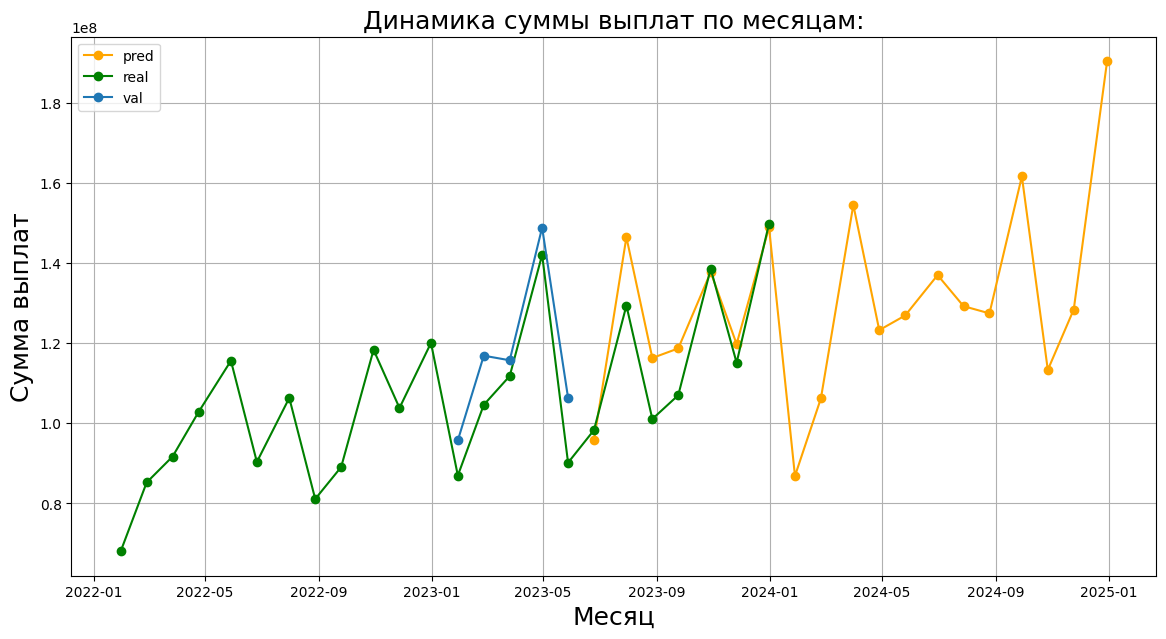

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(pred['tot'], label='pred', marker='o', color='orange')
plt.plot(real['tot'][:24], label='real', marker='o', color='green')
plt.plot(val['tot'], label='val', marker='o')
plt.legend()

plt.title(f'Динамика суммы выплат по месяцам:', fontsize=18)
plt.xlabel('Месяц', fontsize=18)
plt.ylabel('Сумма выплат', fontsize=18)
plt.xticks()
plt.grid(True)
plt.savefig("myPNG1.png")

In [48]:
rmse = np.sqrt(mean_squared_error(real['tot'][12:17], val['tot']))
print("RMSE: " + str(rmse))

RMSE: 10519641.954618068


In [98]:
actual, pred1 = np.array(real['tot'][12:17]), np.array(val['tot'])
mape = np.mean(np.abs((actual - pred1) / actual)) * 100
print("MAPE: " + str(mape))

MAPE: 9.631237996514812


In [97]:
pred['tot'][7:].to_excel("output.xlsx")

# Обучение на датасете с признаками

In [172]:
train_data = dataset.query("(`date` >= @train_start) & (`date` <= @train_end)")
val_data = dataset.query("(`date` >= @val_start) & (`date` <= @val_end)")
test_data = dataset.query("(`date` >= @test_start) & (`date` <= @test_end)")

In [173]:
stepwise_model = auto_arima(
    y=train_data['total_payments'],
    X=train_data.drop(columns=["total_payments"]).fillna(0),
    start_p=1,
    start_q=1,
    max_p=5,
    max_q=5,
    m=18,
    start_P=0,
    seasonal=True,
    d=None,
    D=1,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
    maxiter=50,  # default 50
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[18] intercept   : AIC=inf, Time=1.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,0)[18] intercept   : AIC=-35.182, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[18] intercept   : AIC=-36.480, Time=1.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[18] intercept   : AIC=-40.877, Time=2.45 sec
 ARIMA(0,0,0)(0,1,0)[18]             : AIC=-37.067, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,0)[18] intercept   : AIC=-39.697, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[18] intercept   : AIC=-39.009, Time=1.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[18] intercept   : AIC=-38.933, Time=2.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[18] intercept   : AIC=-41.062, Time=1.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[18] intercept   : AIC=-39.015, Time=2.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,1)[18] intercept   : AIC=-37.326, Time=4.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[18] intercept   : AIC=-36.535, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[18] intercept   : AIC=-39.040, Time=1.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,1,0)[18] intercept   : AIC=-39.202, Time=1.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,0)[18] intercept   : AIC=-41.241, Time=1.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,0)[18] intercept   : AIC=-43.368, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,1)[18] intercept   : AIC=-42.421, Time=1.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,1,1)[18] intercept   : AIC=-40.405, Time=3.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,1,0)[18] intercept   : AIC=-37.688, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,0)[18] intercept   : AIC=-37.672, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,1,0)[18] intercept   : AIC=-39.034, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,1,0)[18] intercept   : AIC=-46.355, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,1,0)[18] intercept   : AIC=-46.853, Time=1.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(2,1,0)[18] intercept   : AIC=-45.218, Time=4.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,1,1)[18] intercept   : AIC=-44.971, Time=3.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,1,1)[18] intercept   : AIC=-47.251, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,1,2)[18] intercept   : AIC=-45.236, Time=3.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,1,2)[18] intercept   : AIC=-43.132, Time=4.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,1,1)[18] intercept   : AIC=-48.439, Time=2.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,1,0)[18] intercept   : AIC=-47.902, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,1,1)[18] intercept   : AIC=-46.831, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,1,2)[18] intercept   : AIC=-46.803, Time=3.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,1,0)[18] intercept   : AIC=-49.251, Time=1.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,1,0)[18] intercept   : AIC=-46.713, Time=3.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(2,1,1)[18] intercept   : AIC=-44.844, Time=4.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(1,1,0)[18] intercept   : AIC=-44.901, Time=1.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(1,1,0)[18] intercept   : AIC=-43.837, Time=1.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,1,0)[18]             : AIC=inf, Time=1.19 sec

Best model:  ARIMA(0,0,3)(1,1,0)[18] intercept
Total fit time: 71.791 seconds


In [ ]:
start_data = train_data.index[-1] + pd.DateOffset(days=1)# Your code here
future_forecast_val = stepwise_model.predict(X = val_data.drop(columns=["total_payments"]), start=start_data, n_periods=21)

start_data = val_data.index[-1] + pd.DateOffset(days=1)# Your code here
future_forecast_test = stepwise_model.predict(X = test_data.drop(columns=["total_payments"]), start=start_data, n_periods=83)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.p

In [ ]:
future_forecast_val = future_forecast_val.rename(index=dict(zip(future_forecast_val.index.tolist(),val_data.index.tolist())))
future_forecast_test = future_forecast_test.rename(index=dict(zip(future_forecast_test.index.tolist(),test_data.index.tolist())))

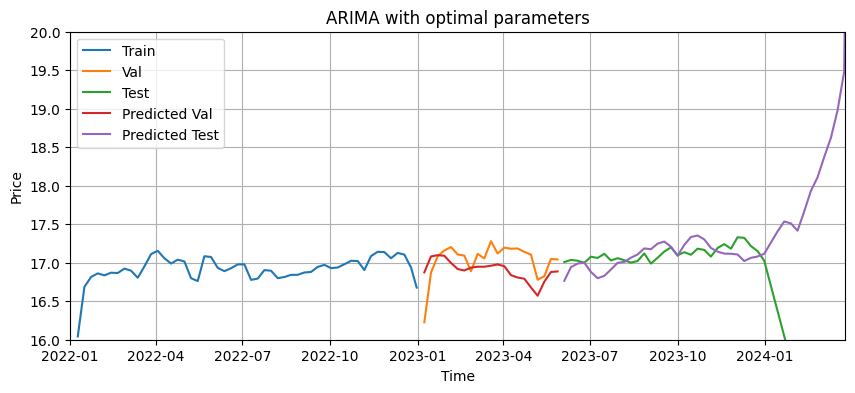

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_data['total_payments'], label="Train")
plt.plot(val_data['total_payments'], label="Val")
plt.plot(test_data['total_payments'], label="Test")
plt.plot(future_forecast_val, label="Predicted Val")
plt.plot(future_forecast_test.sort_index(), label="Predicted Test")


plt.title("ARIMA with optimal parameters")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2024-03-25"))
plt.ylim(16, 20)
plt.show()

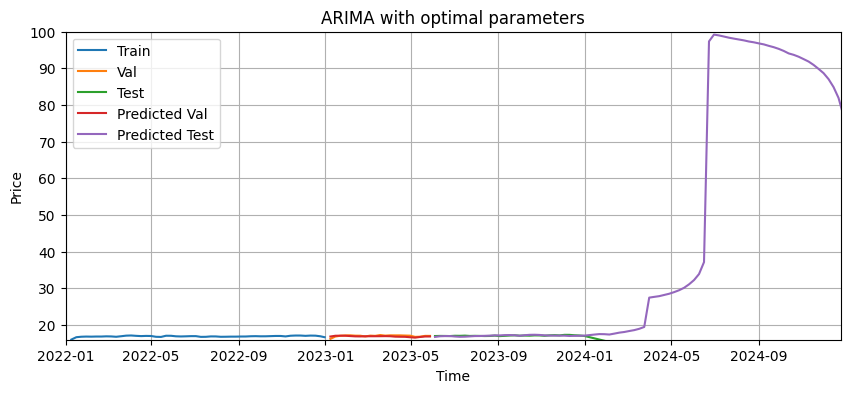

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_data['total_payments'], label="Train")
plt.plot(val_data['total_payments'], label="Val")
plt.plot(test_data['total_payments'], label="Test")
plt.plot(future_forecast_val, label="Predicted Val")
plt.plot(future_forecast_test.sort_index(), label="Predicted Test")


plt.title("ARIMA with optimal parameters")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2024-12-25"))
plt.ylim(16, 100)
plt.show()

Мы наблюдаем в январе тренд вверх, а после того как заканчивается адекватная информация о скользящих средних получается резкий толнчёк вверх